In [1]:
from pylab import *
import dpkt
import numpy as np
%matplotlib notebook

In [2]:
fin = '/data/fast/ban115/capture0_max70.pcap'

In [3]:

times = []
lens = []


for ts, pkt in dpkt.pcap.Reader(open(fin, 'rb')):
    times.append(ts)
    lens.append(len(pkt))


times = np.array(times)
lens = np.array(lens)

tdiff = times[1:] - times[:-1]


In [4]:
times.min()

1677625460.970539

In [5]:
times.max()

1677625461.038609

In [6]:
times.max() - times.min()

0.0680699348449707

<IPython.core.display.Javascript object>


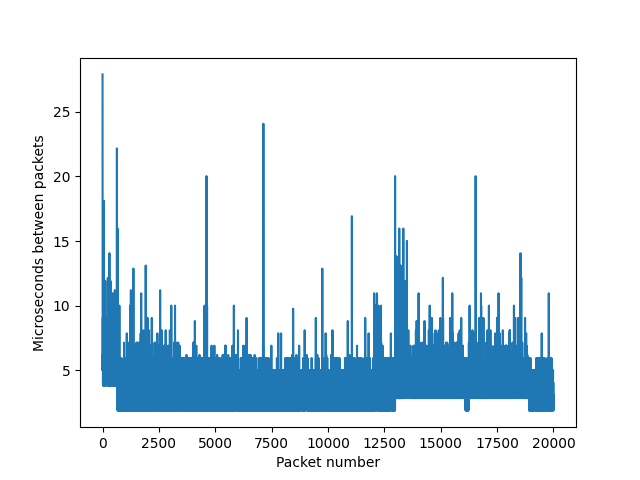

Text(0.5, 0, 'Packet number')

In [7]:
figure()
plot(tdiff[:1000000]*1e6)
ylabel('Microseconds between packets')
xlabel('Packet number')

In [8]:
len(tdiff)

19999

<IPython.core.display.Javascript object>


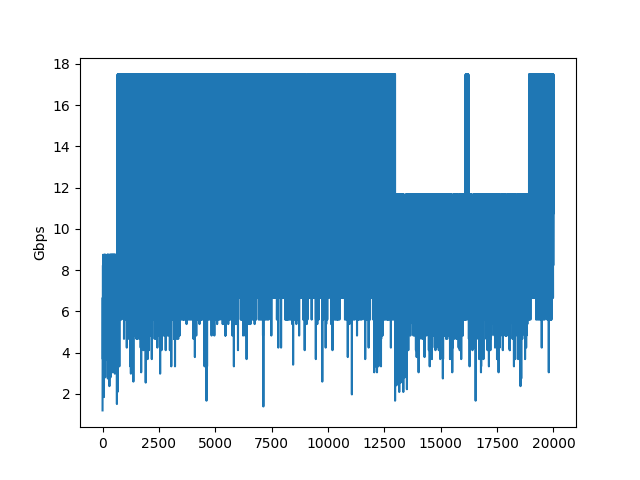

Text(0, 0.5, 'Gbps')

In [9]:
figure()
gbps = lens[:-1]*8/1e9/tdiff
plot(gbps)
ylabel('Gbps')

<IPython.core.display.Javascript object>


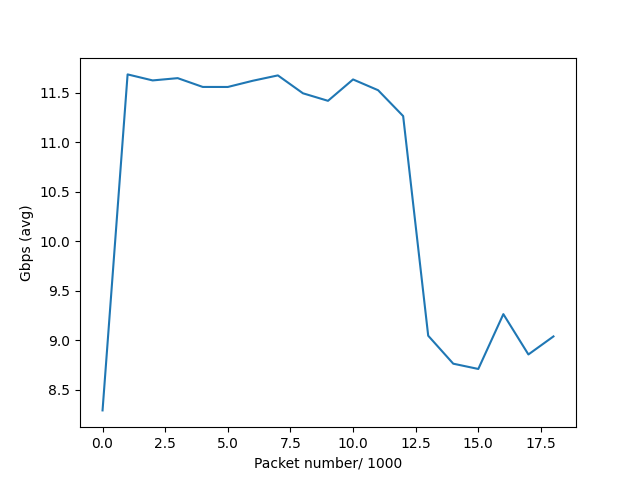

Text(0.5, 0, 'Packet number/ 1000')

In [10]:
figure()
factor = 1000
size = (len(gbps)// factor) * factor
gbps_avg = gbps[:size].reshape(-1,factor).mean(axis=1)
plot(gbps_avg)
ylabel('Gbps (avg)')
xlabel(f'Packet number/ {factor}')

In [11]:
total_bits = sum(lens)*8
total_time = times.max() - times.min()
total_gbps = total_bits / total_time / 1e9
print(f'Got {len(times)} packets totalling {sum(lens)/1e6} Mbytes in {total_time:0.1f} seconds which averages to {total_gbps:0.1f} Gbps')

Got 20000 packets totalling 83.4 Mbytes in 0.1 seconds which averages to 9.8 Gbps


In [12]:
# peak rate is about 5x mean.

<IPython.core.display.Javascript object>


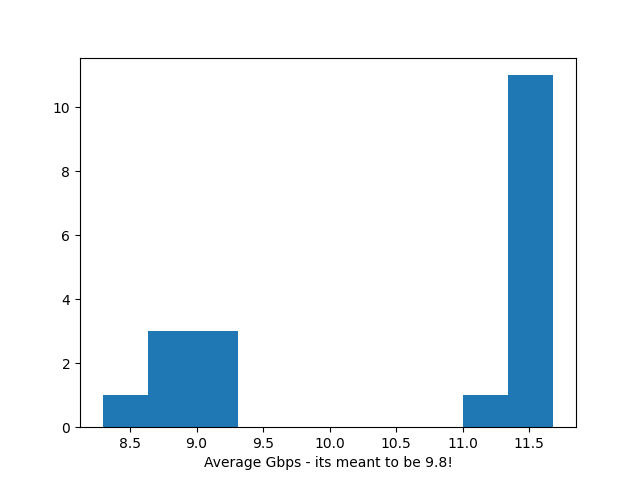

Text(0.5, 0, 'Average Gbps - its meant to be 9.8!')

In [13]:
figure()
hist(gbps_avg[np.isfinite(gbps_avg)])
xlabel(f'Average Gbps - its meant to be {total_gbps:0.1f}!')


<IPython.core.display.Javascript object>


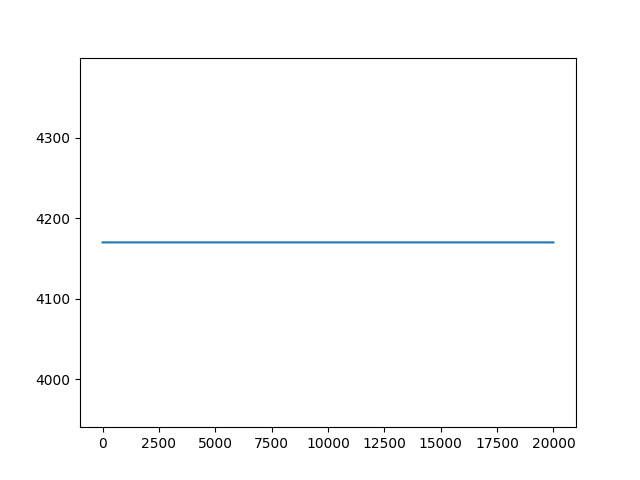

In [14]:
figure()
plot(lens)

In [15]:
binsecs = 100e-6
timestamps = np.arange(times.min(), times.max(), binsecs)

In [16]:
bytes_in_times, _ = np.histogram(times, bins=timestamps, weights=lens)
pkts_in_times, _  = np.histogram(times, bins=timestamps)

<IPython.core.display.Javascript object>


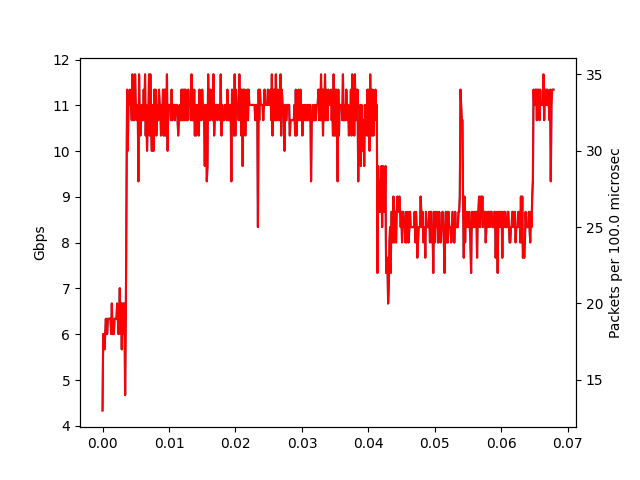

Text(0.5, 0, 'Seconds')

In [17]:
figure()
t = timestamps[:-1] - times.min()
plot(t, bytes_in_times*8/binsecs/1e9)
ylabel('Gbps')
twinx()
plot(t, pkts_in_times, 'r')
ylabel(f'Packets per {binsecs*1e6} microsec')
xlabel('Seconds')
#xlim(0,0.220)